In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import pandas as pd

import sys
sys.path.append('../')
import utils
import plotting



Bad key "text.kerning_factor" on line 4 in
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
ds_MODEL = xr.open_mfdataset('../../GCrundirs/type_NA-out_conc-yr_2016-gridmod_final-validation/OutputDir/HEMCO_diagnostics.2016*.nc', combine = 'by_coords')
ds_NEI = xr.open_mfdataset('../../GCrundirs/type_NA-out_conc-yr_2016-gtropchem/merra2_05x0625_tropchem_na/OutputDir/HEMCO_diagnostics.2016*.nc', combine = 'by_coords')
ds_egrid = xr.open_mfdataset('../../GCrundirs/type_NA-out_conc-yr_2016-gridmod_final-validation-egrid/OutputDir/HEMCO_diagnostics.2016*.nc', combine = 'by_coords')

ds_egrid = ds_egrid.isel(lev = 0)
ds_NEI = ds_NEI.isel(lev = 0)
ds_MODEL = ds_MODEL.isel(lev = 0)

ds = xr.concat([ds_egrid, ds_NEI, ds_MODEL], pd.Index(['egrid', 'NEI', 'MODEL'], name='model_name'))

# Look at the emissions of PM2.5 contributing factors

Options: Ship, BioBurn, Anthro, 
OCPO, OCPI, BCPO, BCPI

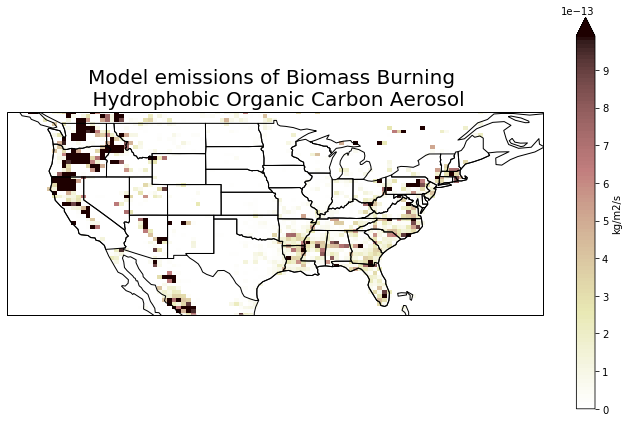

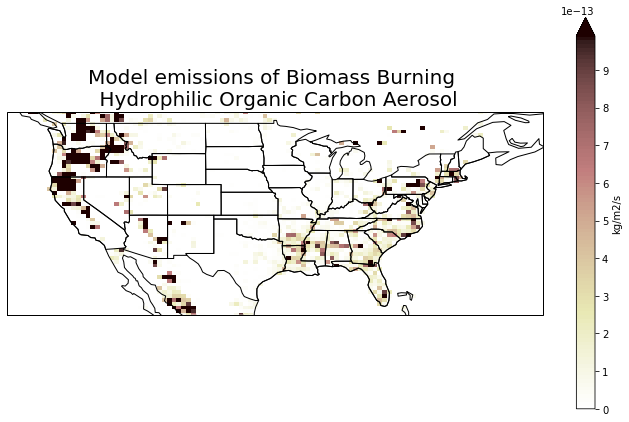

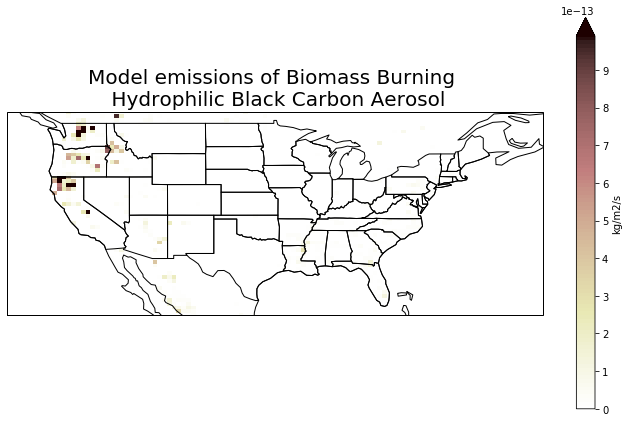

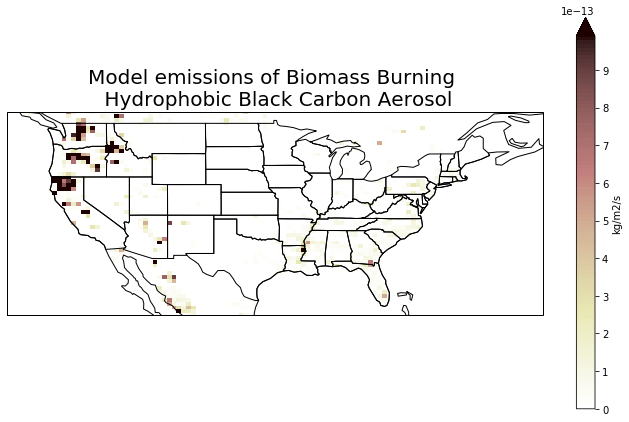

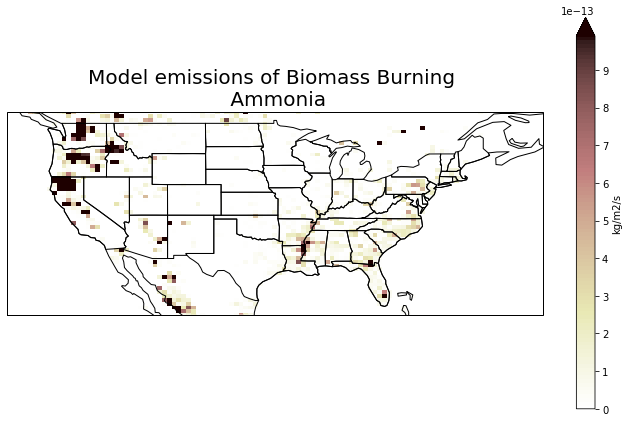

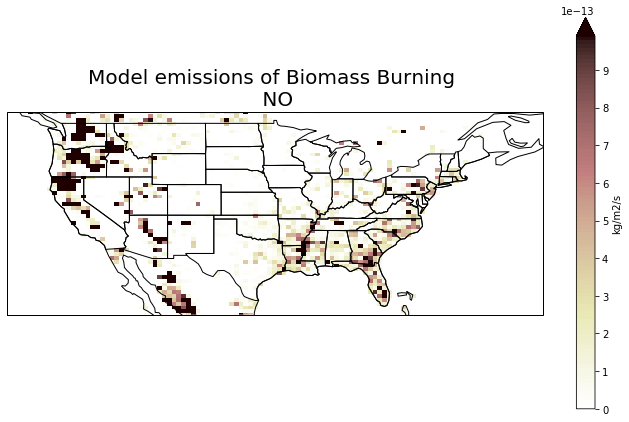

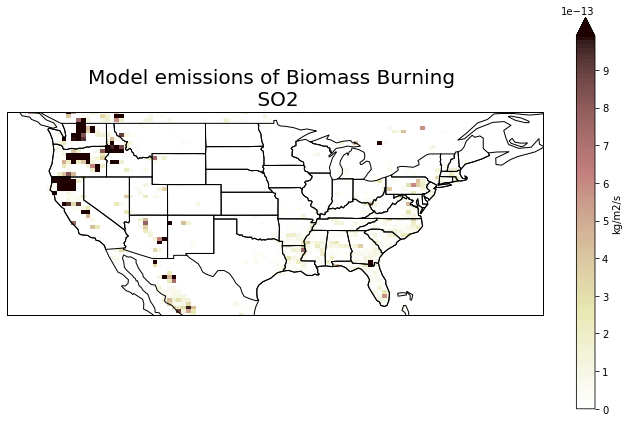

In [3]:
plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisOCPO_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n Hydrophobic Organic Carbon Aerosol', fontsize = 20)

plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisOCPI_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n Hydrophilic Organic Carbon Aerosol', fontsize = 20)

plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisBCPI_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n Hydrophilic Black Carbon Aerosol', fontsize = 20)

plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisBCPO_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n Hydrophobic Black Carbon Aerosol', fontsize = 20);

plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisNH3_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n Ammonia', fontsize = 20);

plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisNO_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n NO', fontsize = 20);

plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisSO2_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n SO2', fontsize = 20);


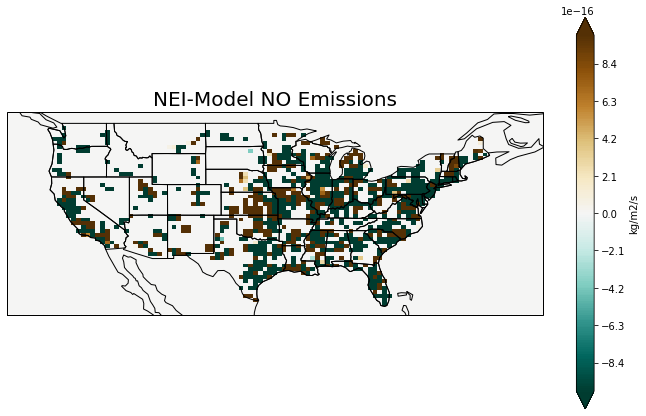

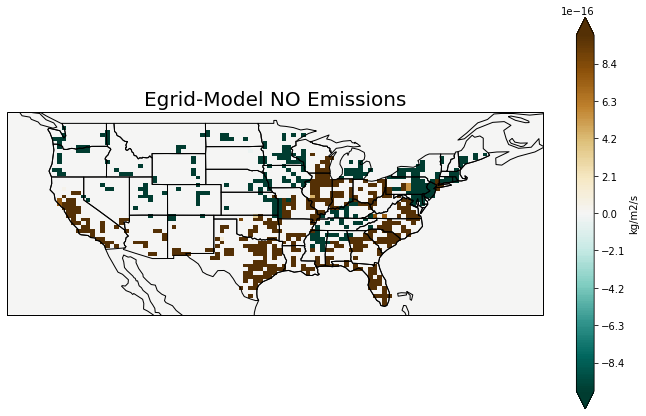

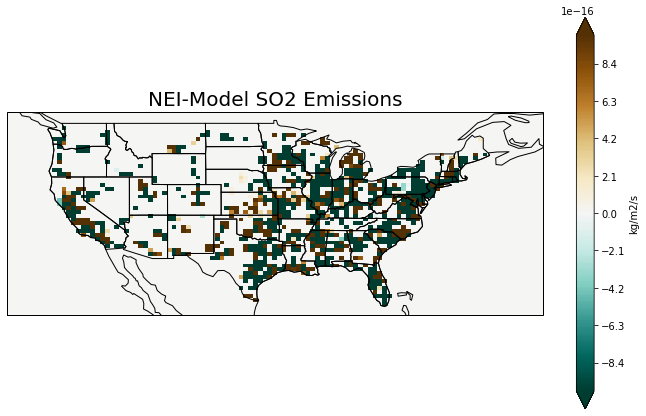

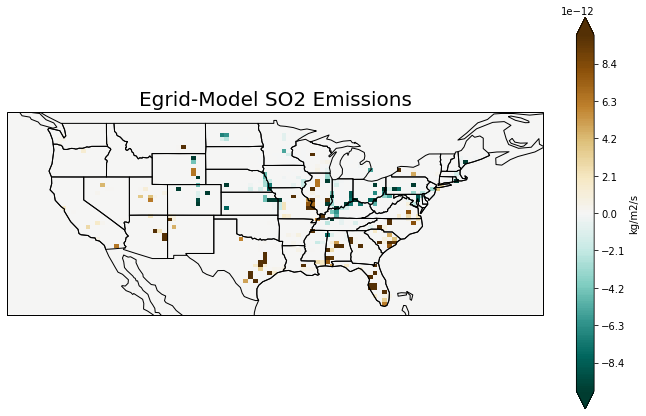

In [4]:
plotting.plot_emissions_dif(ds.sel(model_name = 'NEI'), ds.sel(model_name = 'MODEL'), 'EmisNO_Anthro','JJA', levels = np.arange(-1e-15,1.01e-15,1e-17), lat_lon = utils.lat_lon_dict['US_lat_lon'])
plt.title('NEI-Model NO Emissions', fontsize = 20)
plotting.plot_emissions_dif(ds.sel(model_name = 'egrid'), ds.sel(model_name = 'MODEL'), 'EmisNO_Anthro','JJA', levels = np.arange(-1e-15,1.01e-15,1e-17), lat_lon = utils.lat_lon_dict['US_lat_lon'])
plt.title('Egrid-Model NO Emissions', fontsize = 20);
plotting.plot_emissions_dif(ds.sel(model_name = 'NEI'), ds.sel(model_name = 'MODEL'), 'EmisSO2_Anthro','JJA', levels = np.arange(-1e-15,1.01e-15,1e-17), lat_lon = utils.lat_lon_dict['US_lat_lon'])
plt.title('NEI-Model SO2 Emissions', fontsize = 20)
plotting.plot_emissions_dif(ds.sel(model_name = 'egrid'), ds.sel(model_name = 'MODEL'), 'EmisSO2_Anthro','JJA', levels = np.arange(-1e-11,1.01e-11,1e-13), lat_lon = utils.lat_lon_dict['US_lat_lon'])
plt.title('Egrid-Model SO2 Emissions', fontsize = 20);